# Bike store sales EDA

I'll be analyzing sales made on a bike store.

## Importing libraries

In [195]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Loading our data

In [96]:
df = pd.read_csv('data/sales_data.csv', parse_dates=['Date'])

## The data at a glance

In [97]:
df.head().T

,0,1,2,3,4
Date,2013-11-26 00:00:00,2015-11-26 00:00:00,2014-03-23 00:00:00,2016-03-23 00:00:00,2014-05-15 00:00:00
Day,26,26,23,23,15
Month,November,November,March,March,May
Year,2013,2015,2014,2016,2014
Customer_Age,19,19,49,49,47
Age_Group,Youth (<25),Youth (<25),Adults (35-64),Adults (35-64),Adults (35-64)
Customer_Gender,M,M,M,M,F
Country,Canada,Canada,Australia,Australia,Australia
State,British Columbia,British Columbia,New South Wales,New South Wales,New South Wales
Product_Category,Accessories,Accessories,Accessories,Accessories,Accessories


In [98]:
df.shape

(113036, 18)

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Date              113036 non-null  datetime64[ns]
 1   Day               113036 non-null  int64         
 2   Month             113036 non-null  object        
 3   Year              113036 non-null  int64         
 4   Customer_Age      113036 non-null  int64         
 5   Age_Group         113036 non-null  object        
 6   Customer_Gender   113036 non-null  object        
 7   Country           113036 non-null  object        
 8   State             113036 non-null  object        
 9   Product_Category  113036 non-null  object        
 10  Sub_Category      113036 non-null  object        
 11  Product           113036 non-null  object        
 12  Order_Quantity    113036 non-null  int64         
 13  Unit_Cost         113036 non-null  int64         
 14  Unit

In [100]:
df.describe()

,Date,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,113036,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000
mean,2014-11-23 12:14:55.063519232,15.665753,2014.401739,35.919212,11.901660,267.296366,452.938427,285.051665,469.318695,754.370360
min,2011-01-01 00:00:00,1.000000,2011.000000,17.000000,1.000000,1.000000,2.000000,-30.000000,1.000000,2.000000
25%,2013-12-22 00:00:00,8.000000,2013.000000,28.000000,2.000000,2.000000,5.000000,29.000000,28.000000,63.000000
50%,2014-06-27 00:00:00,16.000000,2014.000000,35.000000,10.000000,9.000000,24.000000,101.000000,108.000000,223.000000
75%,2016-01-09 00:00:00,23.000000,2016.000000,43.000000,20.000000,42.000000,70.000000,358.000000,432.000000,800.000000
max,2016-07-31 00:00:00,31.000000,2016.000000,87.000000,32.000000,2171.000000,3578.000000,15096.000000,42978.000000,58074.000000
std,NaN,8.781567,1.272510,11.021936,9.561857,549.835483,922.071219,453.887443,884.866118,1309.094674


## Numerical analysis and visualization

I'll analyze the `Unit_Cost` column:

In [101]:
df['Unit_Cost'].describe()

count    113036.000000
mean        267.296366
std         549.835483
min           1.000000
25%           2.000000
50%           9.000000
75%          42.000000
max        2171.000000
Name: Unit_Cost, dtype: float64

In [102]:
df['Unit_Cost'].mean()

267.296365759581

In [103]:
df['Unit_Cost'].median()

9.0

<Axes: >

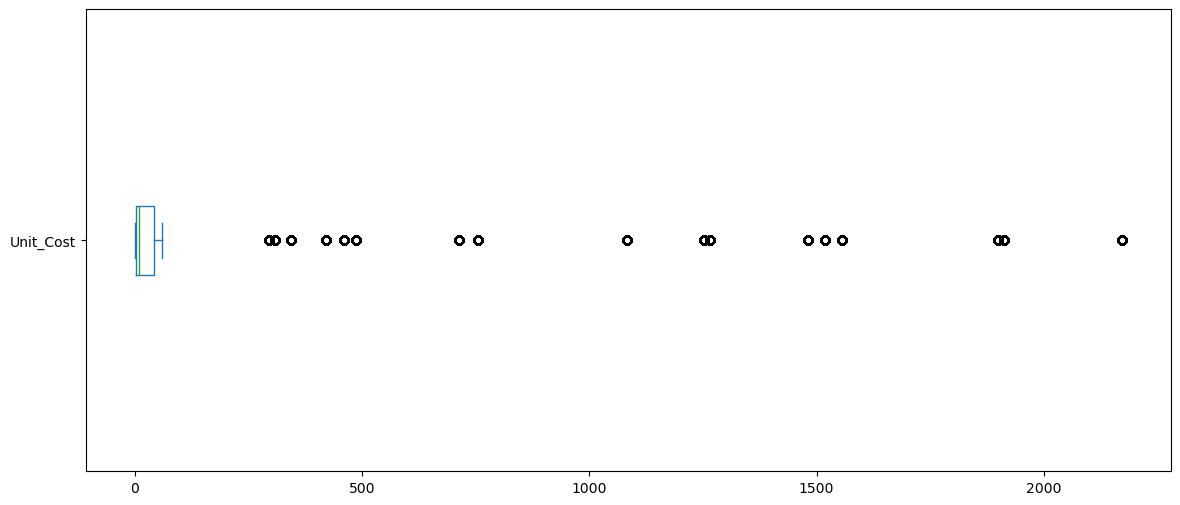

In [104]:
df['Unit_Cost'].plot(kind='box', vert=False, figsize=(14,6))

<Axes: ylabel='Density'>

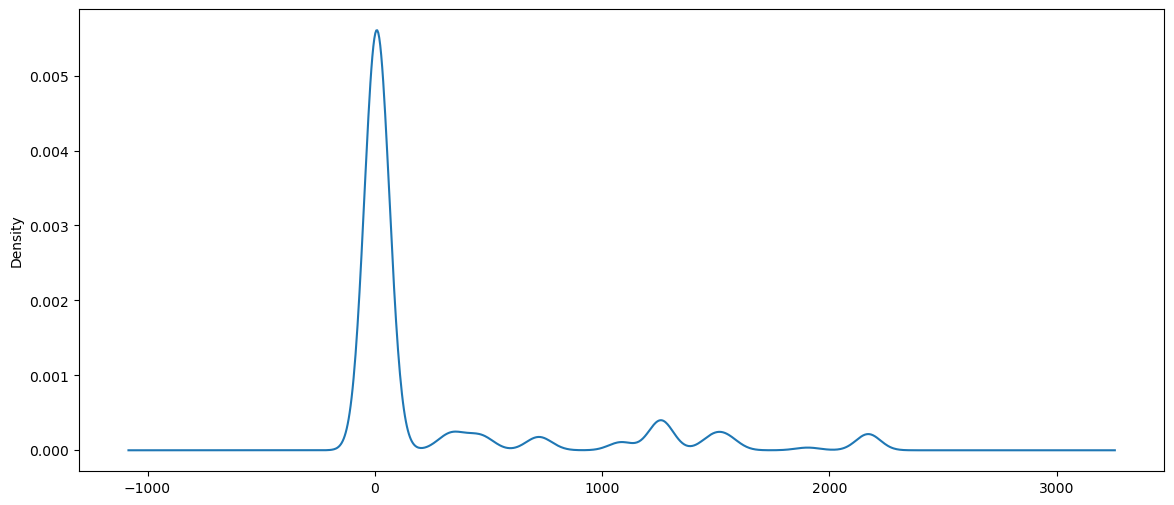

In [105]:
df['Unit_Cost'].plot(kind='density', figsize=(14,6)) # kde

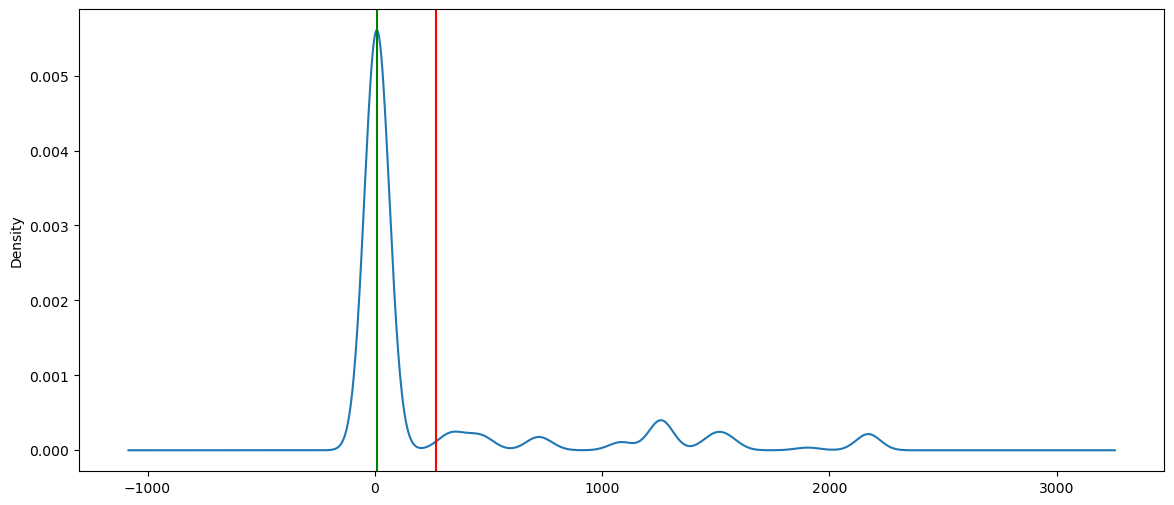

In [106]:
ax = df['Unit_Cost'].plot(kind='density', figsize=(14,6)) # kde
ax.axvline(df['Unit_Cost'].mean(), color='red')
ax.axvline(df['Unit_Cost'].median(), color='green')

Text(0.5, 0, 'dollars')

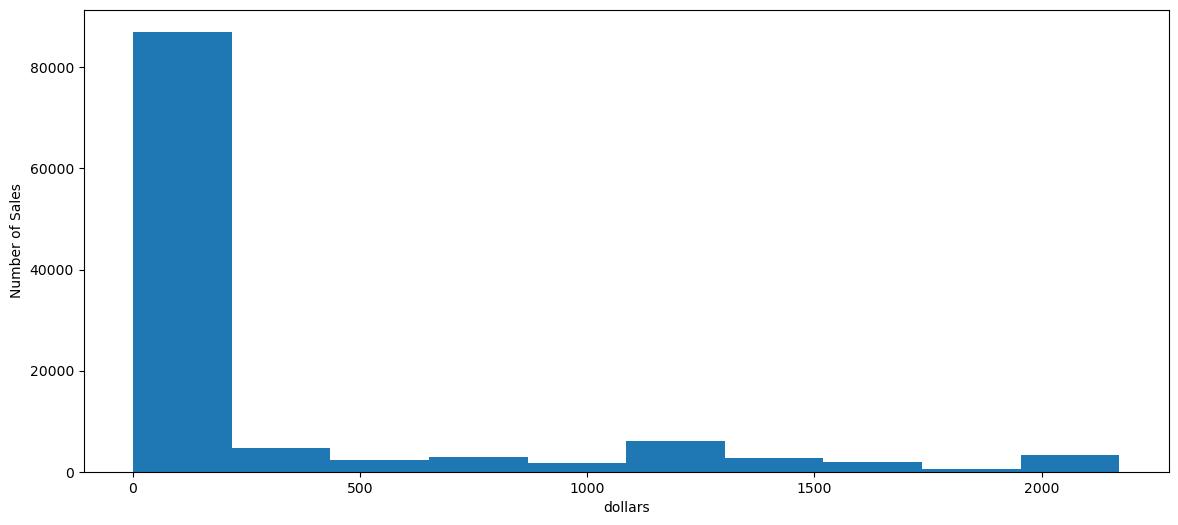

In [107]:
ax = df['Unit_Cost'].plot(kind='hist', figsize=(14,6))
ax.set_ylabel('Number of Sales')
ax.set_xlabel('dollars')

## Categorical analysis and visualization

I'll analyze the `Age_Group` column:

In [108]:
df.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [109]:
df['Age_Group'].value_counts()

Age_Group
Adults (35-64)          55824
Young Adults (25-34)    38654
Youth (<25)             17828
Seniors (64+)             730
Name: count, dtype: int64

<Axes: ylabel='count'>

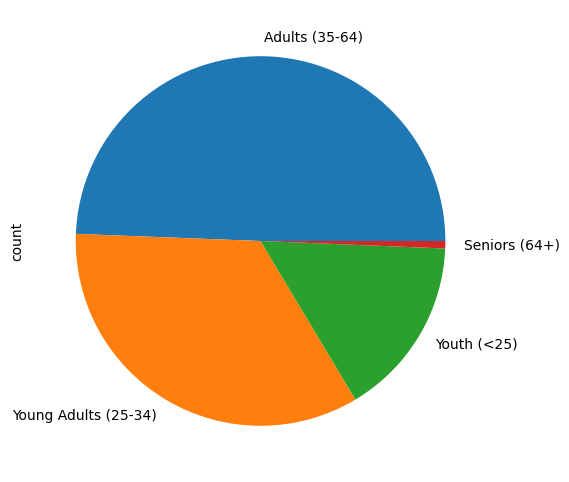

In [110]:
df['Age_Group'].value_counts().plot(kind='pie', figsize=(6,6))

Text(0, 0.5, 'Number of Sales')

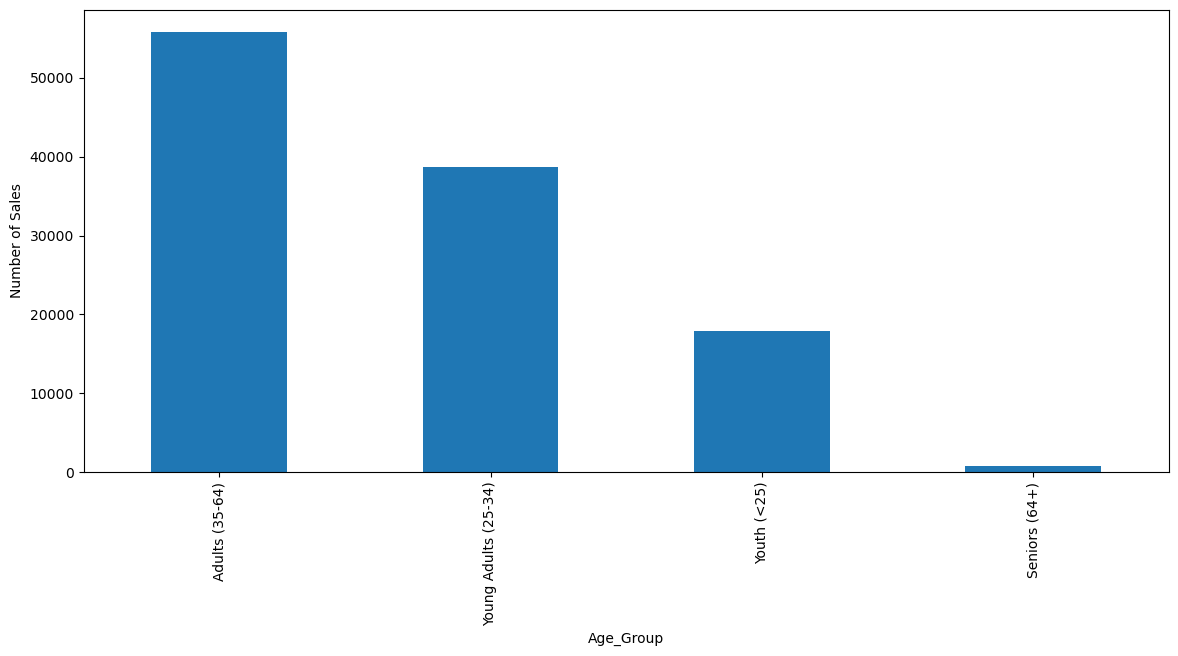

In [111]:
ax = df['Age_Group'].value_counts().plot(kind='bar', figsize=(14,6))
ax.set_ylabel('Number of Sales')

## Relationship between the columns?

Can we find any significant relationship?

In [112]:
corr = df.corr(numeric_only=True)

corr

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
Day,1.000000,-0.007635,-0.014296,-0.002412,0.003133,0.003207,0.004623,0.003329,0.003853
Year,-0.007635,1.000000,0.040994,0.123169,-0.217575,-0.213673,-0.181525,-0.215604,-0.208673
Customer_Age,-0.014296,0.040994,1.000000,0.026887,-0.021374,-0.020262,0.004319,-0.016013,-0.009326
Order_Quantity,-0.002412,0.123169,0.026887,1.000000,-0.515835,-0.515925,-0.238863,-0.340382,-0.312895
Unit_Cost,0.003133,-0.217575,-0.021374,-0.515835,1.000000,0.997894,0.741020,0.829869,0.817865
Unit_Price,0.003207,-0.213673,-0.020262,-0.515925,0.997894,1.000000,0.749870,0.826301,0.818522
Profit,0.004623,-0.181525,0.004319,-0.238863,0.741020,0.749870,1.000000,0.902233,0.956572
Cost,0.003329,-0.215604,-0.016013,-0.340382,0.829869,0.826301,0.902233,1.000000,0.988758
Revenue,0.003853,-0.208673,-0.009326,-0.312895,0.817865,0.818522,0.956572,0.988758,1.000000


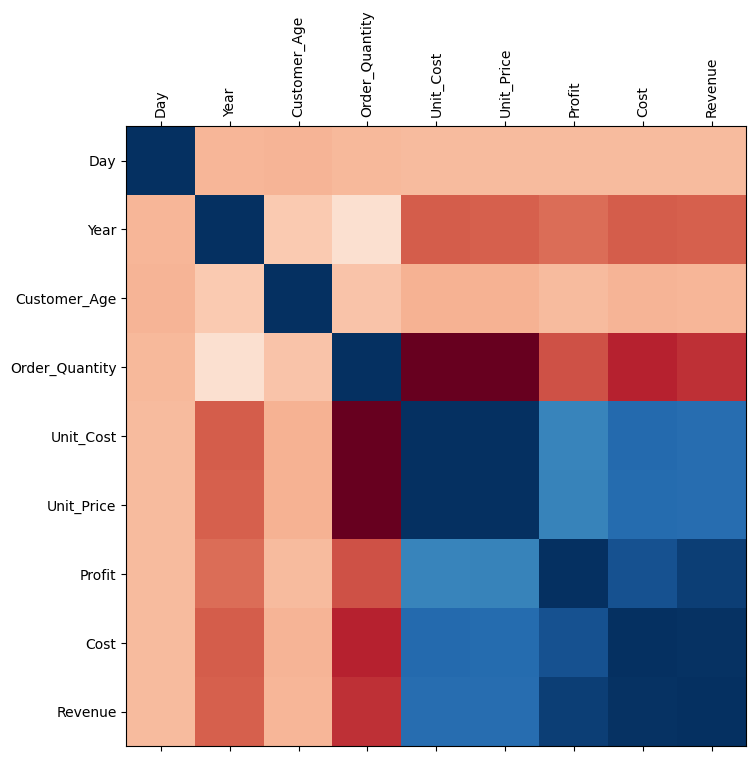

In [113]:
fig = plt.figure(figsize=(8,8))
plt.matshow(corr, cmap='RdBu', fignum=fig.number)
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical');
plt.yticks(range(len(corr.columns)), corr.columns);

<Axes: xlabel='Customer_Age', ylabel='Revenue'>

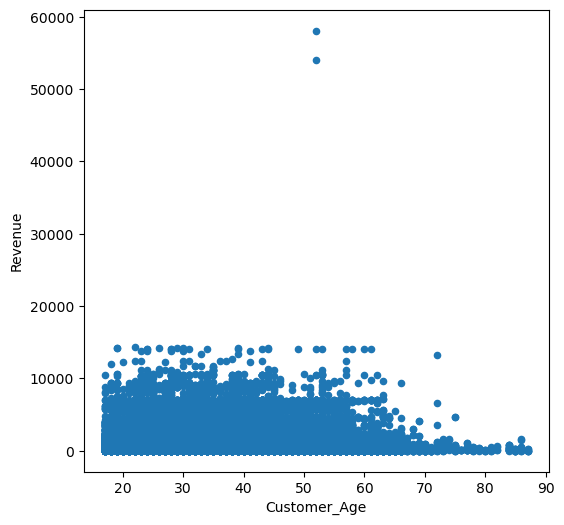

In [114]:
df.plot(kind='scatter', x='Customer_Age', y='Revenue', figsize=(6,6))

<Axes: xlabel='Revenue', ylabel='Profit'>

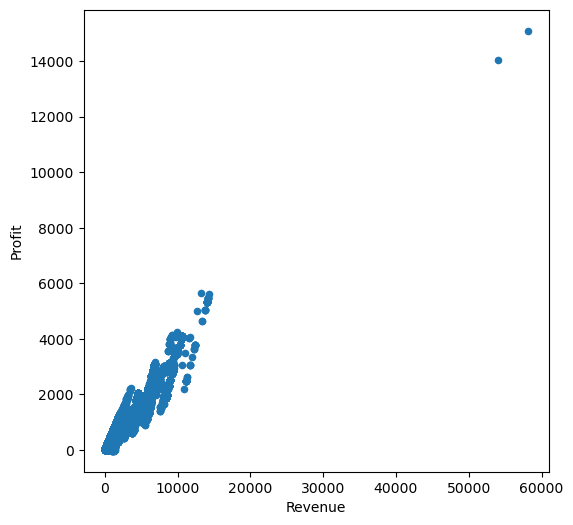

In [115]:
df.plot(kind='scatter', x='Revenue', y='Profit', figsize=(6,6))

Text(0, 0.5, 'Profit')

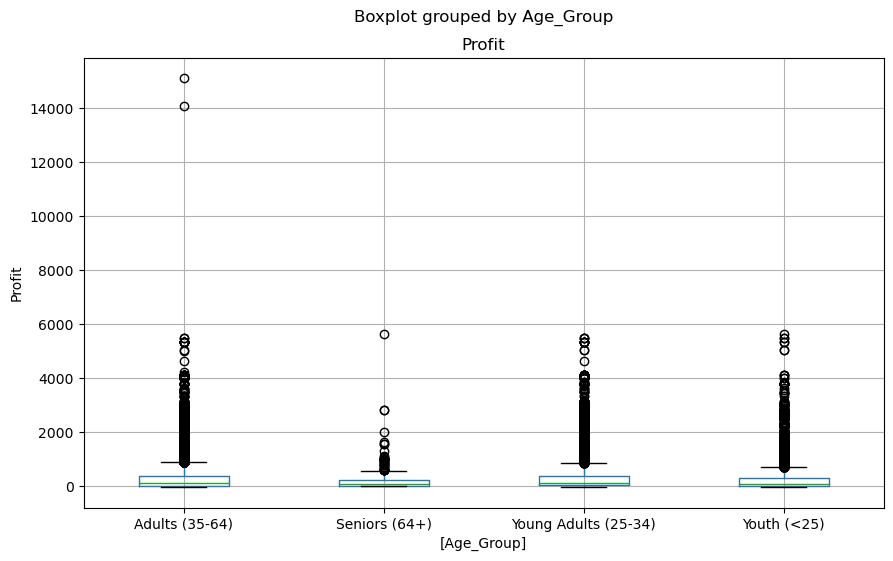

In [116]:
ax = df[['Profit', 'Age_Group']].boxplot(by='Age_Group', figsize=(10,6))
ax.set_ylabel('Profit')

Year                 Axes(0.125,0.53;0.227941x0.35)
Customer_Age      Axes(0.398529,0.53;0.227941x0.35)
Order_Quantity    Axes(0.672059,0.53;0.227941x0.35)
Unit_Cost            Axes(0.125,0.11;0.227941x0.35)
Unit_Price        Axes(0.398529,0.11;0.227941x0.35)
Profit            Axes(0.672059,0.11;0.227941x0.35)
dtype: object

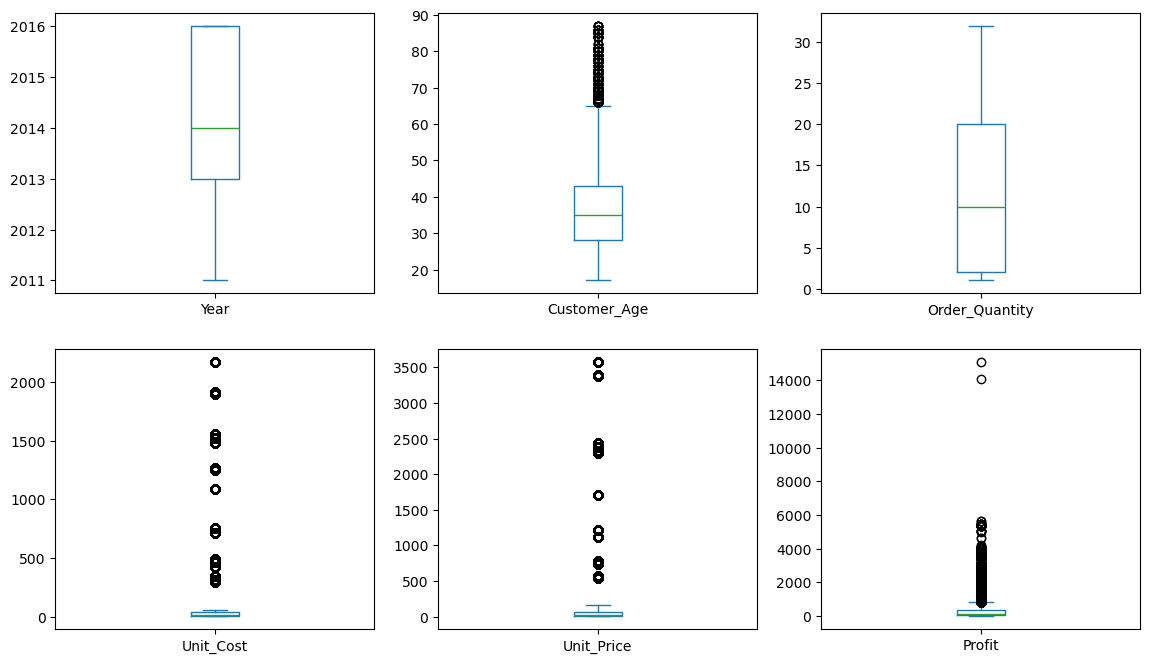

In [117]:
boxplot_cols = ['Year', 'Customer_Age', 'Order_Quantity', 'Unit_Cost', 'Unit_Price', 'Profit']

df[boxplot_cols].plot(kind='box', subplots=True, layout=(2,3), figsize=(14,8))

## Column wrangling

We can also create new columns or modify existing ones.

### Adding a new `Revenue_per_Age` column

In [118]:
df['Revenue_per_Age'] = df['Revenue'] / df['Customer_Age']

df['Revenue_per_Age'].head()

0    50.000000
1    50.000000
2    49.000000
3    42.612245
4     8.893617
Name: Revenue_per_Age, dtype: float64

<Axes: ylabel='Density'>

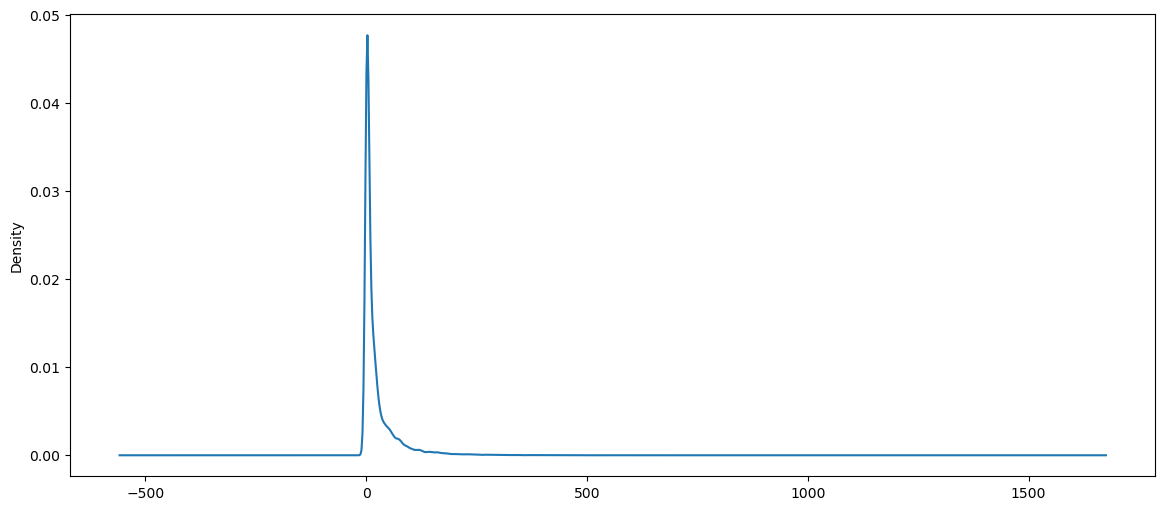

In [119]:
df['Revenue_per_Age'].plot(kind='density', figsize=(14,6))

<Axes: ylabel='Frequency'>

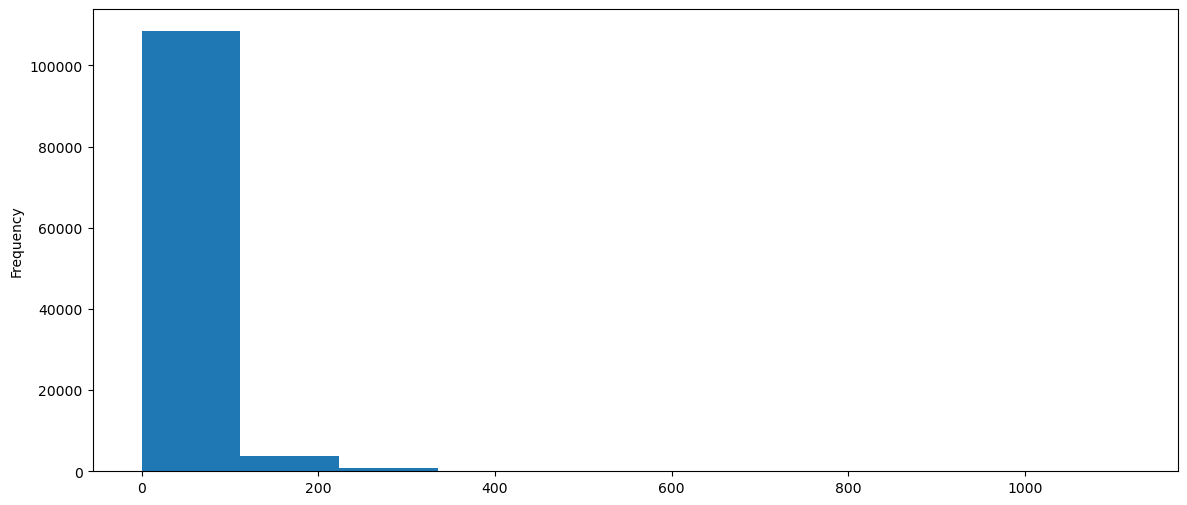

In [120]:
df['Revenue_per_Age'].plot(kind='hist', figsize=(14,6))

### Adding a new `Calculated_Cost` column

The formula used:     Calculated\_Cost = Order\_Quantity * Unit\_Cost

In [121]:
df['Calculated_Cost'] = df['Order_Quantity'] * df['Unit_Cost']

df['Calculated_Cost'].head()

0     360
1     360
2    1035
3     900
4     180
Name: Calculated_Cost, dtype: int64

In [122]:
(df['Calculated_Cost'] != df['Cost']).sum()

0

We can see the relationship between `Cost` and `Profit` using a scatter plot:

<Axes: xlabel='Calculated_Cost', ylabel='Profit'>

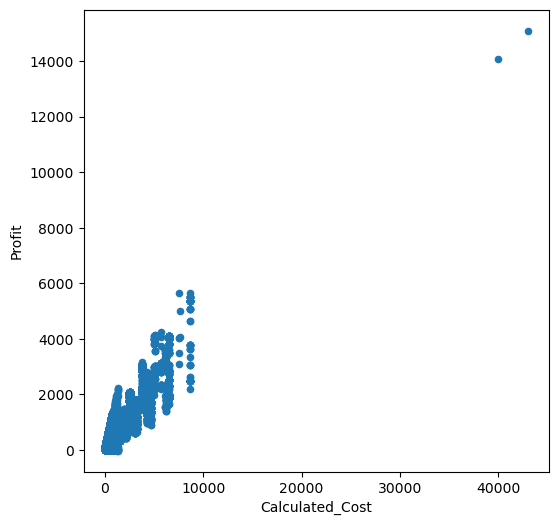

In [123]:
df.plot(kind='scatter', x='Calculated_Cost', y='Profit', figsize=(6,6))

### Adding a new `Calculated_Revenue` column

The formula: Calculated\_Revenue = Cost + Profit

In [124]:
df['Calculated_Revenue'] = df['Cost'] + df['Profit']

df['Calculated_Revenue'].head()

0     950
1     950
2    2401
3    2088
4     418
Name: Calculated_Revenue, dtype: int64

In [125]:
(df['Calculated_Revenue'] != df['Revenue']).sum()

0

In [126]:
df.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,...,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Revenue_per_Age,Calculated_Cost,Calculated_Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,...,Hitch Rack - 4-Bike,8,45,120,590,360,950,50.000000,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,...,Hitch Rack - 4-Bike,8,45,120,590,360,950,50.000000,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,...,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401,49.000000,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,...,Hitch Rack - 4-Bike,20,45,120,1188,900,2088,42.612245,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,...,Hitch Rack - 4-Bike,4,45,120,238,180,418,8.893617,180,418


<Axes: ylabel='Frequency'>

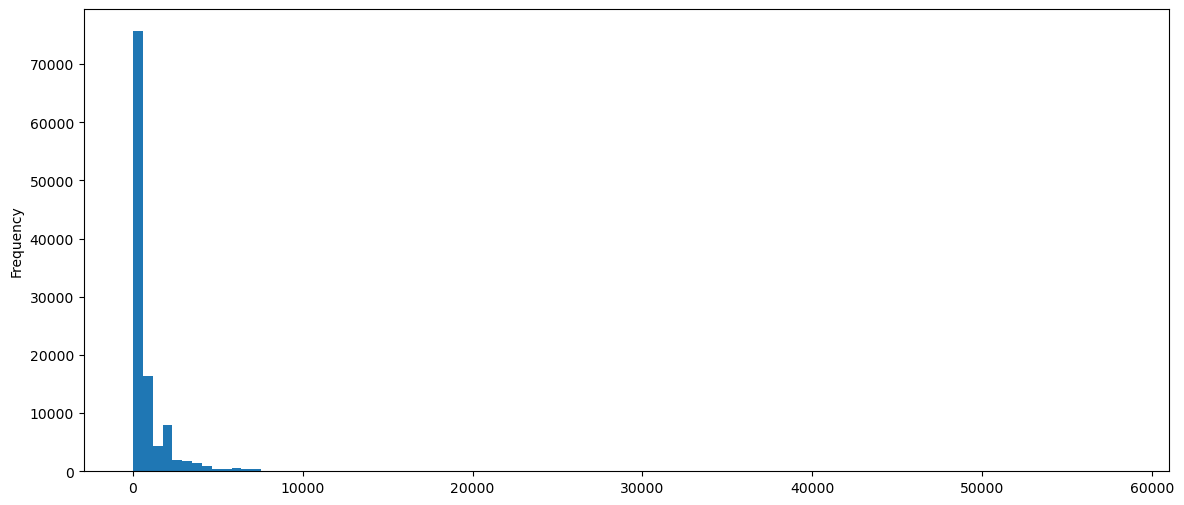

In [127]:
df['Revenue'].plot(kind='hist', bins=100, figsize=(14,6))

### Modifying all `Unit_Price` values adding 3% tax to them

In [128]:
df['Unit_Price'].head()

0    120
1    120
2    120
3    120
4    120
Name: Unit_Price, dtype: int64

In [129]:
#df['Unit_Price'] = df['Unit_Price'] * 1.03

df['Unit_Price'] *= 1.03

In [130]:
df['Unit_Price'].head()

0    123.6
1    123.6
2    123.6
3    123.6
4    123.6
Name: Unit_Price, dtype: float64

## Selection & Indexing:

### Getting all the sales made in the state of `Kentucky`

In [131]:
df.loc[df['State'] == 'Kentucky']

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,...,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Revenue_per_Age,Calculated_Cost,Calculated_Revenue
156,2013-11-04,4,November,2013,40,Adults (35-64),M,United States,Kentucky,Accessories,...,Hitch Rack - 4-Bike,1,45,123.60,63,45,108,2.700,45,108
157,2015-11-04,4,November,2015,40,Adults (35-64),M,United States,Kentucky,Accessories,...,Hitch Rack - 4-Bike,1,45,123.60,63,45,108,2.700,45,108
23826,2014-04-16,16,April,2014,40,Adults (35-64),M,United States,Kentucky,Accessories,...,Fender Set - Mountain,12,8,22.66,142,96,238,5.950,96,238
23827,2016-04-16,16,April,2016,40,Adults (35-64),M,United States,Kentucky,Accessories,...,Fender Set - Mountain,14,8,22.66,165,112,277,6.925,112,277
31446,2014-04-16,16,April,2014,40,Adults (35-64),M,United States,Kentucky,Accessories,...,"Sport-100 Helmet, Blue",29,13,36.05,537,377,914,22.850,377,914
31447,2016-04-16,16,April,2016,40,Adults (35-64),M,United States,Kentucky,Accessories,...,"Sport-100 Helmet, Blue",31,13,36.05,574,403,977,24.425,403,977
79670,2014-04-16,16,April,2014,40,Adults (35-64),M,United States,Kentucky,Accessories,...,ML Mountain Tire,2,11,30.90,32,22,54,1.350,22,54
79671,2014-04-16,16,April,2014,40,Adults (35-64),M,United States,Kentucky,Accessories,...,ML Mountain Tire,21,11,30.90,336,231,567,14.175,231,567
79672,2016-04-16,16,April,2016,40,Adults (35-64),M,United States,Kentucky,Accessories,...,ML Mountain Tire,1,11,30.90,16,11,27,0.675,11,27
79673,2016-04-16,16,April,2016,40,Adults (35-64),M,United States,Kentucky,Accessories,...,ML Mountain Tire,18,11,30.90,288,198,486,12.150,198,486


### Getting the mean revenue of the `Adults (35-64)` sales group

In [132]:
df.loc[df['Age_Group'] == 'Adults (35-64)', 'Revenue'].mean()

762.8287654055604

### How many records belong to Age Group `Youth (<25)` or `Adults (35-64)`?

In [133]:
df.loc[(df['Age_Group'] == 'Youth (<25)') | (df['Age_Group'] == 'Adults (35-64)')].shape[0]

73652

### Getting the mean revenue of the sales group `Adults (35-64)` in `United States`

In [134]:
df.loc[(df['Age_Group'] == 'Adults (35-64)') & (df['Country'] == 'United States'), 'Revenue'].mean()

726.7260473588342

### Increasing the revenue by 10% to every sale made in France

In [135]:
df.loc[df['Country'] == 'France', 'Revenue'].head()

50     787
51     787
52    2957
53    2851
60     626
Name: Revenue, dtype: int64

In [136]:
#df.loc[df['Country'] == 'France', 'Revenue'] = df.loc[df['Country'] == 'France', 'Revenue'] * 1.1

df.loc[df['Country'] == 'France', 'Revenue'] *= 1.1

C:\Users\serda\AppData\Local\Temp\ipykernel_30436\3274489381.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 865.7  865.7 3252.7 ...  473.  1386.  1327.7]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['Country'] == 'France', 'Revenue'] *= 1.1


In [137]:
df.loc[df['Country'] == 'France', 'Revenue'].head()

50     865.7
51     865.7
52    3252.7
53    3136.1
60     688.6
Name: Revenue, dtype: float64

### What's the mean of `Customer_Age`?

In [138]:
df['Customer_Age'].mean()


35.91921157861212

Density (KDE)</b> and a <b>box plot</b> with the `Customer_Age` data:

<Axes: ylabel='Density'>

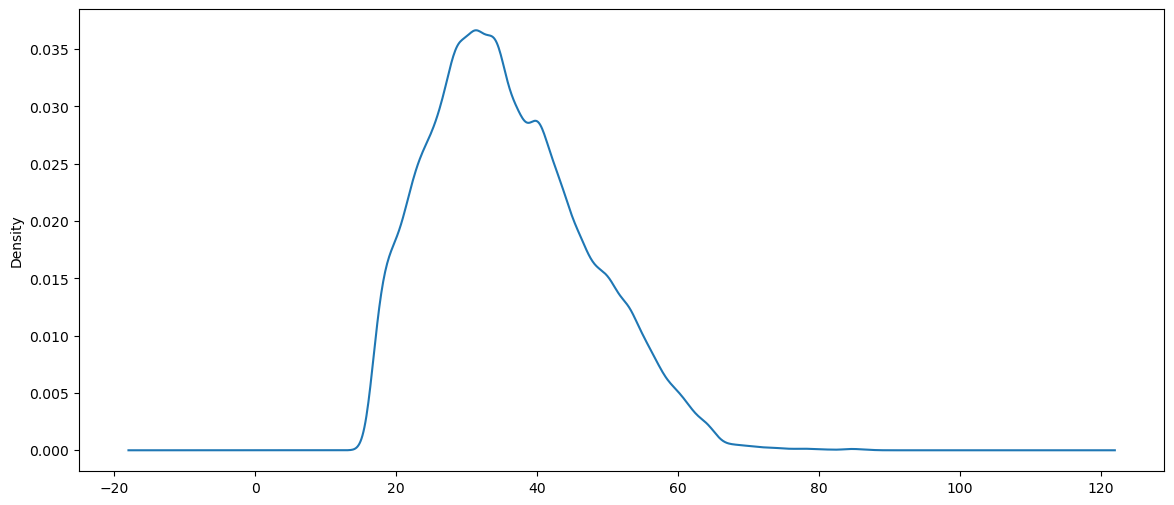

In [139]:
df['Customer_Age'].plot(kind='density', figsize=(14,6))


<Axes: >

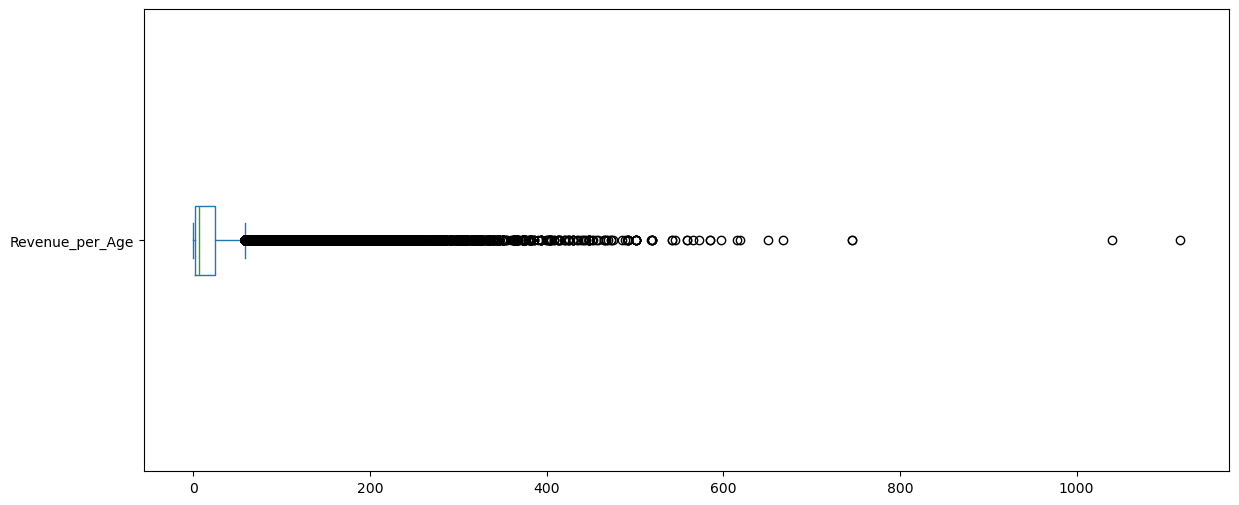

In [140]:
df['Revenue_per_Age'].plot(kind='box', vert=False, figsize=(14,6))

### What's the mean of `Order_Quantity`?

In [141]:
df['Order_Quantity'].mean()


11.901659648253654

<b>histogram</b> and a <b>box plot</b> with the `Order_Quantity` data:

<Axes: ylabel='Frequency'>

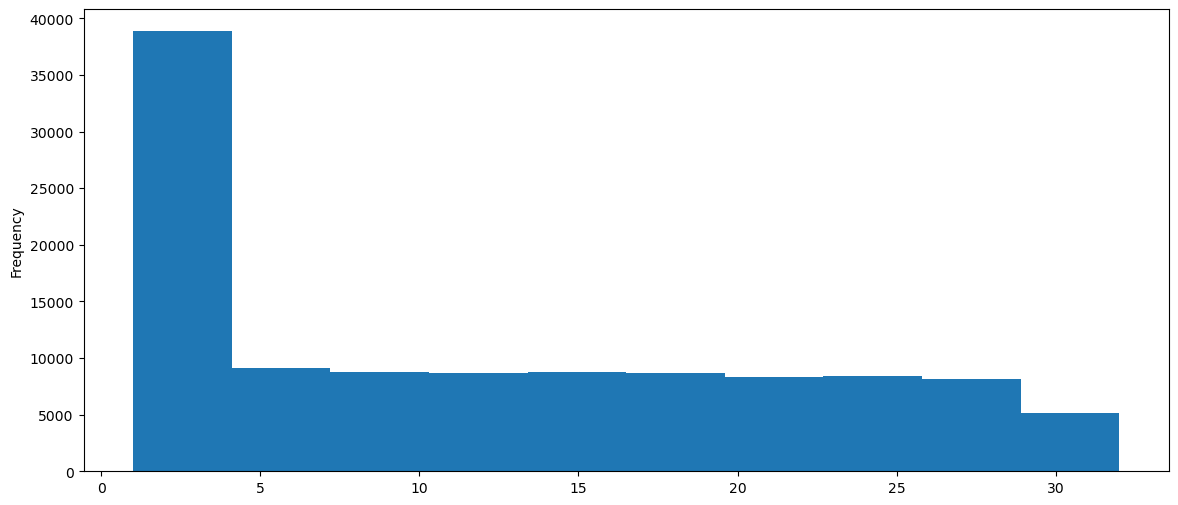

In [142]:
df['Order_Quantity'].plot(kind='hist', figsize=(14,6))

<Axes: >

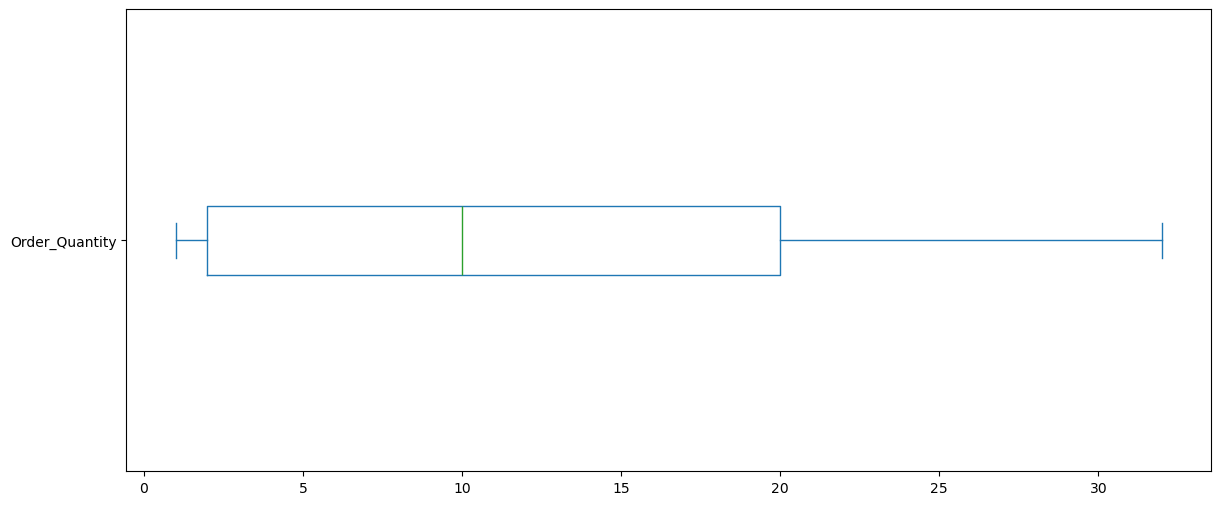

In [143]:
df['Order_Quantity'].plot(kind='box', vert=False, figsize=(14,6))

### How many sales per year do we have?

In [144]:
df.groupby('Year')['Order_Quantity'].sum()


Year
2011      5260
2012      5354
2013    294787
2014    379585
2015    289517
2016    370813
Name: Order_Quantity, dtype: int64

Showing a <b>pie plot</b> with the previous data:

<Axes: ylabel='Order_Quantity'>

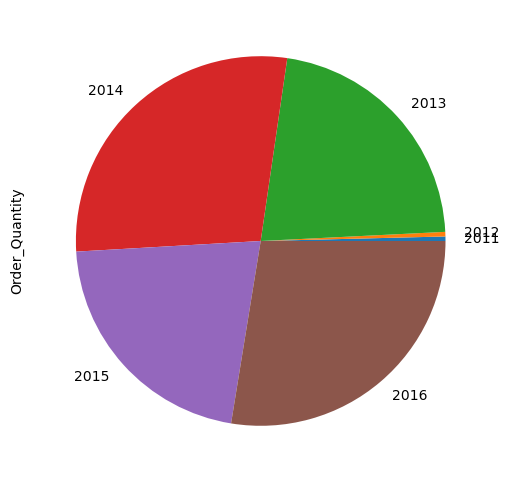

In [145]:
df.groupby('Year')['Order_Quantity'].sum().plot(kind='pie', figsize=(6,6))


### How many sales per month do we have?

In [146]:
df.groupby('Month')['Order_Quantity'].sum()


Month
April        118467
August       103119
December     133312
February     104717
January      110367
July          89787
June         128591
March        111085
May          125715
November     108637
October      108348
September    103171
Name: Order_Quantity, dtype: int64

Showing a <b>bar plot</b> with the previous data:

<Axes: xlabel='Month'>

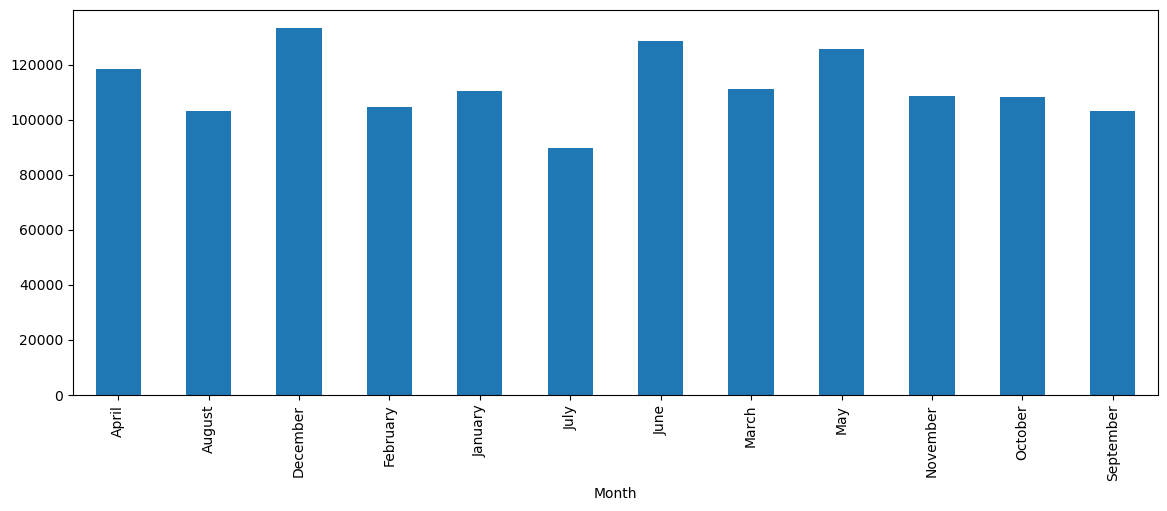

In [147]:
df.groupby('Month')['Order_Quantity'].sum().plot(kind='bar', figsize=(14,5))


### Which country has the most sales `quantity of sales`?

In [148]:
df.groupby('Country')['Order_Quantity'].sum().sort_values(ascending=False).head(1)


Country
United States    477539
Name: Order_Quantity, dtype: int64

In [149]:
df.groupby('Country')['Order_Quantity'].sum().sort_values(ascending=False)

Country
United States     477539
Australia         263585
Canada            192259
United Kingdom    157218
France            128995
Germany           125720
Name: Order_Quantity, dtype: int64

Showing a <b>bar plot</b> of the sales per country:

<Axes: xlabel='Country'>

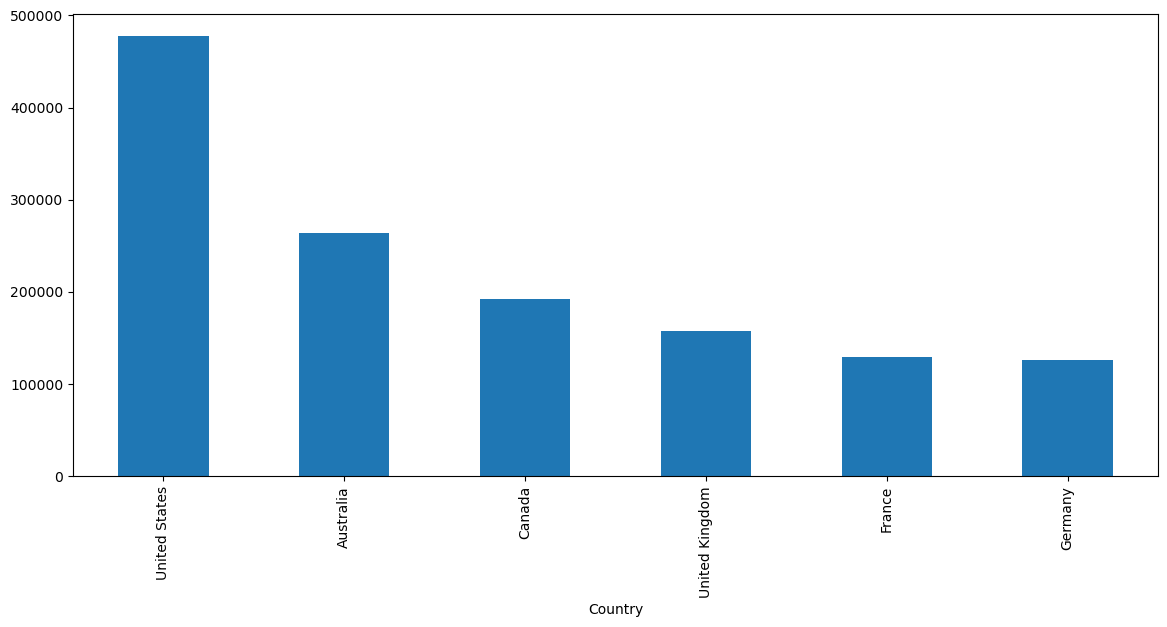

In [150]:
df.groupby('Country')['Order_Quantity'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(14,6))


### Creating a list of every product sold

In [151]:
df.loc[:, 'Product']


0         Hitch Rack - 4-Bike
1         Hitch Rack - 4-Bike
2         Hitch Rack - 4-Bike
3         Hitch Rack - 4-Bike
4         Hitch Rack - 4-Bike
                 ...         
113031        Classic Vest, S
113032        Classic Vest, M
113033        Classic Vest, M
113034        Classic Vest, L
113035        Classic Vest, L
Name: Product, Length: 113036, dtype: object

Creating a **bar plot** showing the 10 most sold products (best sellers):

In [152]:
df.loc[:, 'Product'].value_counts().head(10)

Product
Water Bottle - 30 oz.      10794
Patch Kit/8 Patches        10416
Mountain Tire Tube          6816
AWC Logo Cap                4358
Sport-100 Helmet, Red       4220
Road Tire Tube              4176
Sport-100 Helmet, Black     4152
Fender Set - Mountain       4032
Sport-100 Helmet, Blue      3788
Touring Tire Tube           3702
Name: count, dtype: int64

<Axes: xlabel='Product'>

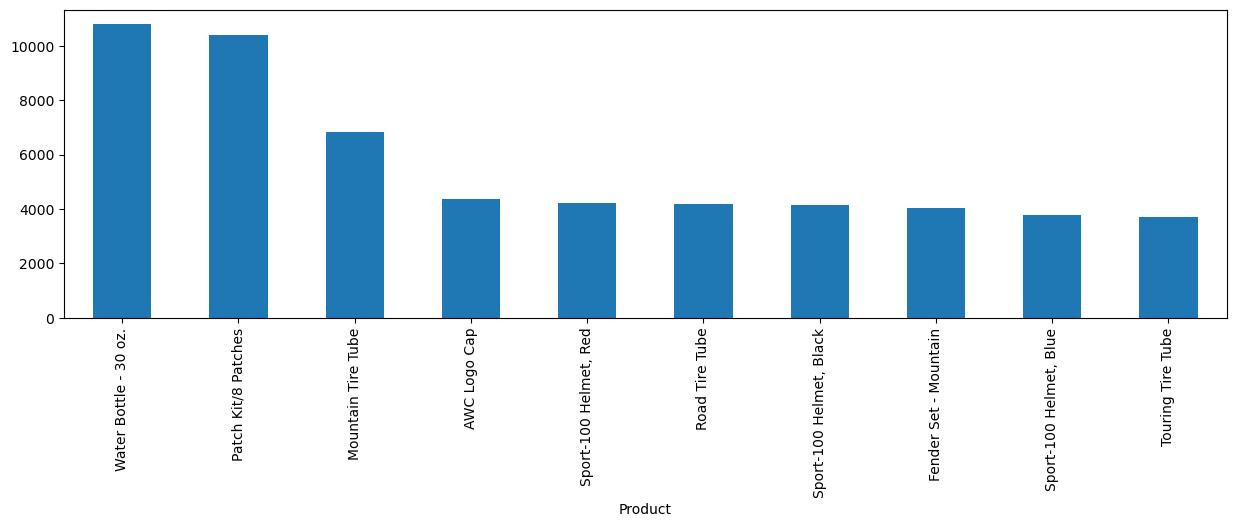

In [153]:
df.loc[:, 'Product'].value_counts().head(10).plot(kind='bar', figsize=(15,4))

### Is there any relationship between `Unit_Cost` and `Unit_Price`?

Showing a <b>scatter plot</b> between both columns.

<Axes: xlabel='Unit_Cost', ylabel='Unit_Price'>

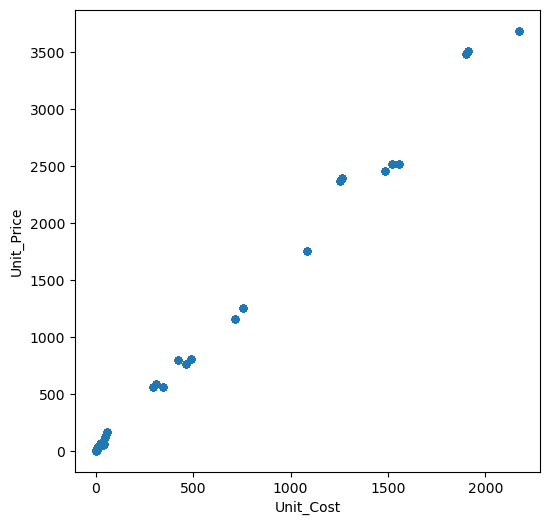

In [154]:
df.plot(kind='scatter', x='Unit_Cost', y='Unit_Price', figsize=(6,6))


### Is there any relationship between `Order_Quantity` and `Profit`?

Showing a <b>scatter plot</b> between both columns.

<Axes: xlabel='Order_Quantity', ylabel='Profit'>

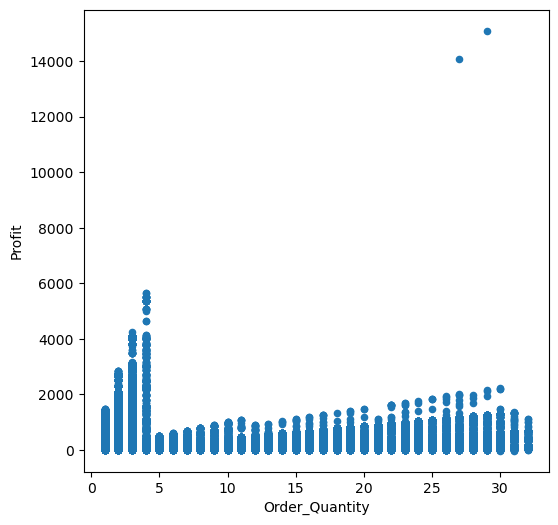

In [155]:
df.plot(kind='scatter', x='Order_Quantity', y='Profit', figsize=(6,6))


### Is there any relationship between `Profit` per `Country`?

Showing a grouped <b>box plot</b> per country with the profit values.

<Axes: title={'center': 'Profit'}, xlabel='[Country]'>

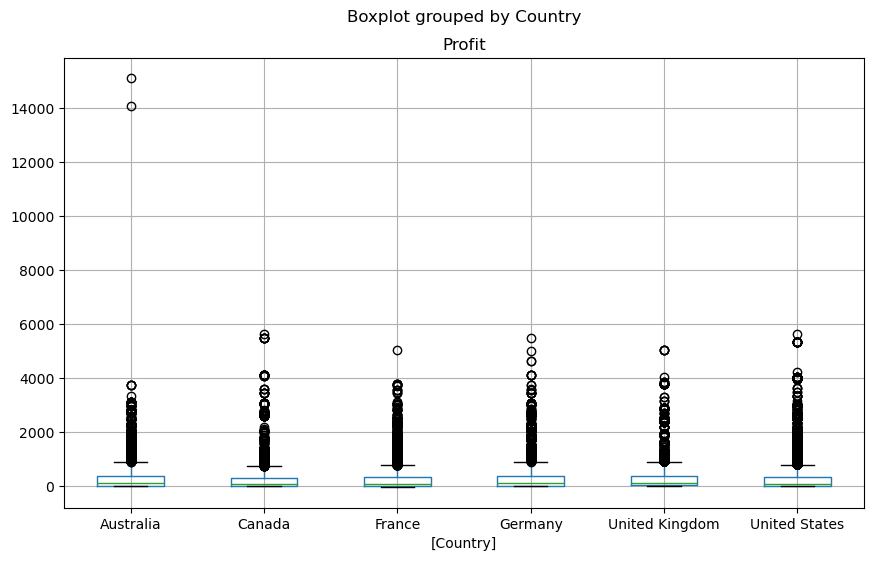

In [156]:
df[['Profit', 'Country']].boxplot(by='Country', figsize=(10,6))


### Is there any relationship between the `Customer_Age` per `Country`?

Showing a grouped <b>box plot</b> per country with the customer age values.

<Axes: title={'center': 'Customer_Age'}, xlabel='[Country]'>

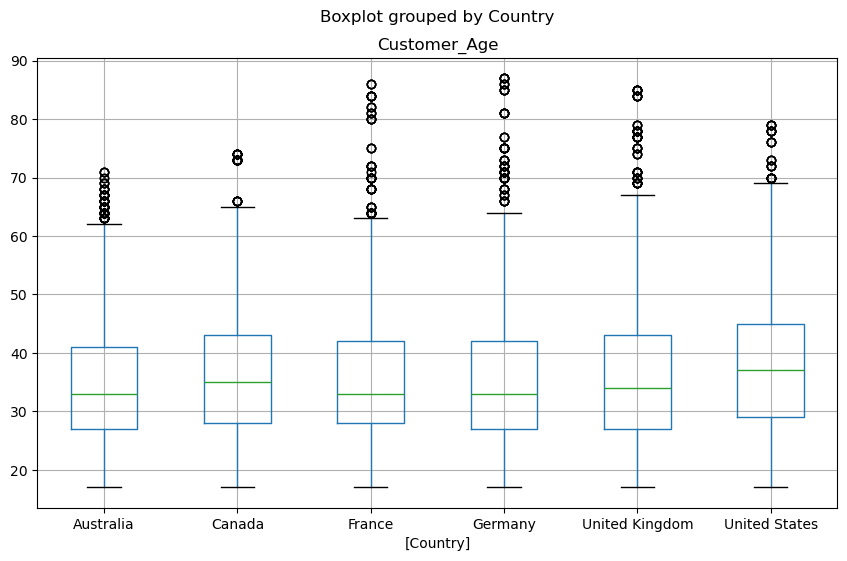

In [157]:
df[['Customer_Age', 'Country']].boxplot(by='Country', figsize=(10,6) )


### Adding a new `Calculated_Date` column

I Used `Day`, `Month`, `Year` to create a `Date` column (`YYYY-MM-DD`).

In [197]:
df[['Year', 'Month', 'Day']]

,Year,Month,Day
0,2013,November,26
1,2015,November,26
2,2014,March,23
3,2016,March,23
4,2014,May,15
...,...,...,...
113031,2016,April,12
113032,2014,April,2
113033,2016,April,2
113034,2014,March,4


In [158]:
df['Calculated_Date'] = df['Year'].astype(str) + '-' + df['Month'].astype(str) + '-' + df['Day'].astype(str)
df['Calculated_Date'] 


0         2013-November-26
1         2015-November-26
2            2014-March-23
3            2016-March-23
4              2014-May-15
                ...       
113031       2016-April-12
113032        2014-April-2
113033        2016-April-2
113034        2014-March-4
113035        2016-March-4
Name: Calculated_Date, Length: 113036, dtype: object

In [201]:
#df[['Year', 'Month', 'Day']].apply(lambda x: '{}-{}-{}'.format(x[0], x[1], x[2]), axis=1)
df[['Year', 'Month', 'Day']].apply(lambda x: '{}-{}-{}'.format(x.iloc[0], x.iloc[1], x.iloc[2]), axis=1)

0         2013-November-26
1         2015-November-26
2            2014-March-23
3            2016-March-23
4              2014-May-15
                ...       
113031       2016-April-12
113032        2014-April-2
113033        2016-April-2
113034        2014-March-4
113035        2016-March-4
Length: 113036, dtype: object

### Parsing the `Calculated_Date` column into a datetime object

In [159]:
df['Calculated_Date'] = pd.to_datetime(df['Calculated_Date'])
df['Calculated_Date']


0        2013-11-26
1        2015-11-26
2        2014-03-23
3        2016-03-23
4        2014-05-15
            ...    
113031   2016-04-12
113032   2014-04-02
113033   2016-04-02
113034   2014-03-04
113035   2016-03-04
Name: Calculated_Date, Length: 113036, dtype: datetime64[ns]

### How did sales evolve through the years?

Showing a <b>line plot</b> using `Calculated_Date` column as the x-axis and the count of sales as the y-axis.

<Axes: xlabel='Calculated_Date'>

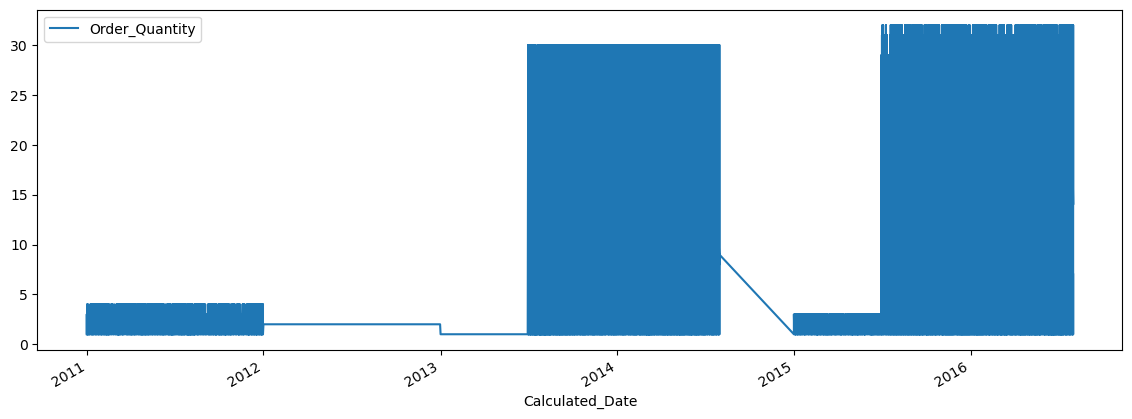

In [160]:
df.plot(kind='line', x='Calculated_Date', y='Order_Quantity', figsize=(14,5))
# sns.lineplot(df['Calculated_Date'].value_counts())

c:\Users\serda\anaconda3\envs\DA\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\serda\anaconda3\envs\DA\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Calculated_Date', ylabel='count'>

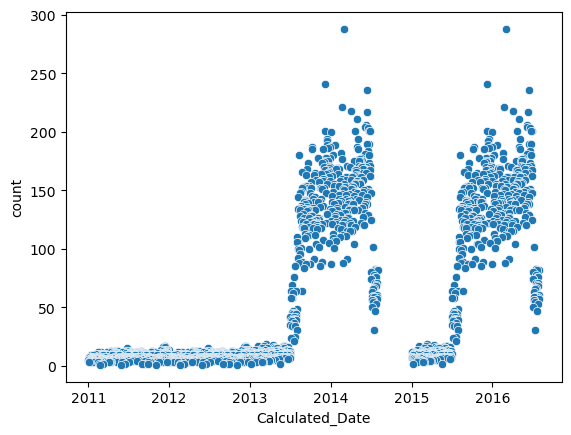

In [196]:
sns.scatterplot(df['Calculated_Date'].value_counts())

### Increasing 50 U$S revenue to every sale

In [161]:
df['Revenue'] = df['Revenue'] + 50
# df['Revenue'] += 50

### How many orders were made in `Canada` or `France`?

In [162]:
len(df[(df['Country'] == 'Canada') | (df['Country'] == 'France')])
# df.loc[(df['Country'] == 'Canada') | (df['Country'] == 'France')].shape[0]

25176

### How many `Bike Racks` orders were made from Canada?

In [194]:
# df[(df['Country'] == 'Canada') & (df['Sub_Category'] == 'Bike Racks')]
df[df['Country'] == 'Canada'][df['Sub_Category'] == 'Bike Racks']

C:\Users\serda\AppData\Local\Temp\ipykernel_30436\1790484199.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['Country'] == 'Canada'][df['Sub_Category'] == 'Bike Racks']


,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,...,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Revenue_per_Age,Calculated_Cost,Calculated_Revenue,Calculated_Date
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,...,8,45,123.6,590,360,1000.0,50.000000,360,950,2013-11-26
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,...,8,45,123.6,590,360,1000.0,50.000000,360,950,2015-11-26
14,2013-08-02,2,August,2013,29,Young Adults (25-34),M,Canada,British Columbia,Accessories,...,5,45,123.6,369,225,644.0,20.482759,225,594,2013-08-02
15,2015-08-02,2,August,2015,29,Young Adults (25-34),M,Canada,British Columbia,Accessories,...,7,45,123.6,517,315,882.0,28.689655,315,832,2015-08-02
16,2013-09-02,2,September,2013,29,Young Adults (25-34),M,Canada,British Columbia,Accessories,...,2,45,123.6,148,90,288.0,8.206897,90,238,2013-09-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2016-04-13,13,April,2016,40,Adults (35-64),M,Canada,British Columbia,Accessories,...,2,45,123.6,148,90,288.0,5.950000,90,238,2016-04-13
496,2014-04-30,30,April,2014,40,Adults (35-64),M,Canada,British Columbia,Accessories,...,6,45,123.6,443,270,763.0,17.825000,270,713,2014-04-30
497,2016-04-30,30,April,2016,40,Adults (35-64),M,Canada,British Columbia,Accessories,...,5,45,123.6,369,225,644.0,14.850000,225,594,2016-04-30
512,2013-08-25,25,August,2013,26,Young Adults (25-34),M,Canada,British Columbia,Accessories,...,3,45,123.6,221,135,406.0,13.692308,135,356,2013-08-25


### How many orders were made in each region (state) of France?

In [164]:
df[df['Country'] == 'France'].groupby(['State'])['State'].count().sort_values(ascending=False)
# df.loc[sales['Country'] == 'France', 'State'].value_counts()

State
Seine (Paris)        2328
Seine Saint Denis    1684
Nord                 1670
Hauts de Seine       1084
Essonne               994
Yveline               954
Seine et Marne        394
Moselle               386
Loiret                382
Val d'Oise            264
Garonne (Haute)       208
Val de Marne          158
Charente-Maritime     148
Somme                 134
Loir et Cher          120
Pas de Calais          90
Name: State, dtype: int64

Showing a <b>bar plot</b> with the results:

<Axes: xlabel='State'>

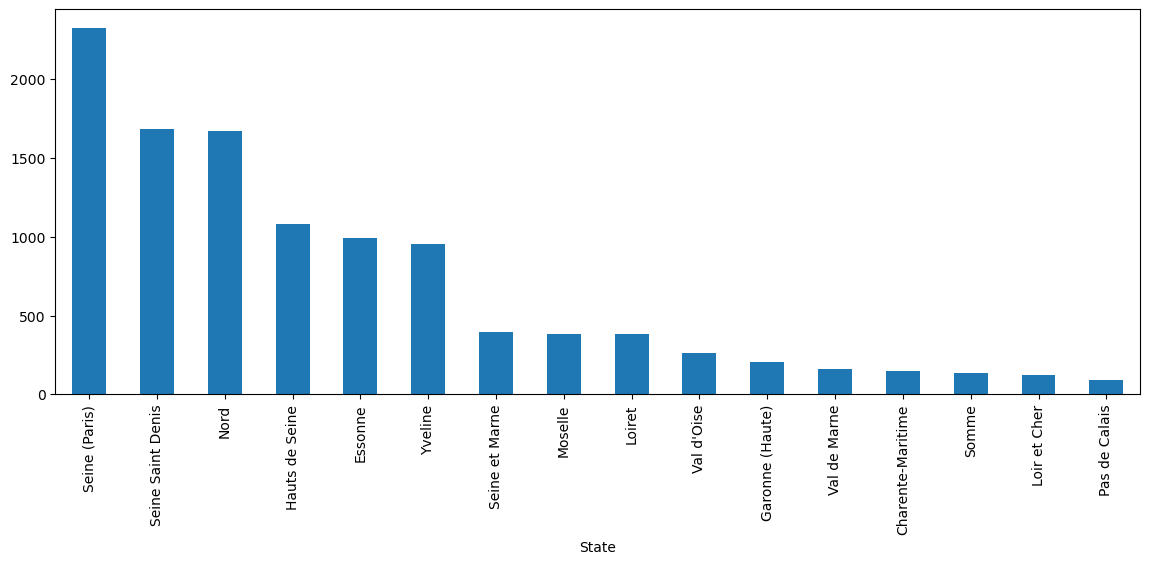

In [165]:
df[df['Country'] == 'France'].groupby(['State'])['State'].count().sort_values(ascending=False).plot(kind='bar', figsize=(14,5))


### How many sales were made per category?

In [166]:
df.groupby(['Product_Category'])['Date'].count()


Product_Category
Accessories    70120
Bikes          25982
Clothing       16934
Name: Date, dtype: int64

Go ahead and show a <b>pie plot</b> with the results:

<Axes: ylabel='Date'>

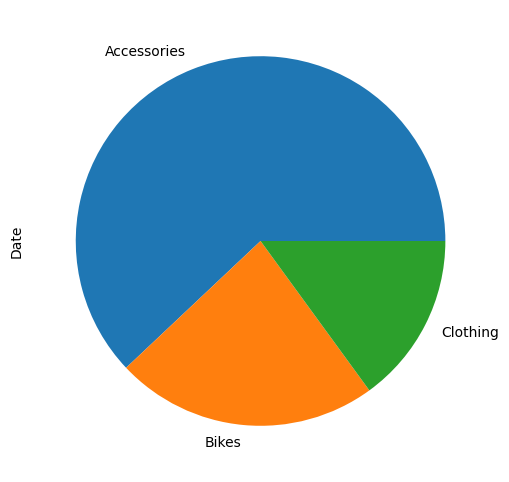

In [167]:
df.groupby(['Product_Category'])['Date'].count().plot(kind='pie', figsize=(6,6))


### How many orders were made per Sub_Category for the Product_Category = Accessories?

In [168]:
df[df['Product_Category'] == 'Accessories'].groupby(['Sub_Category']).size().sort_values(ascending=False)
# df.loc[sales['Product_Category'] == 'Accessories']

Sub_Category
Tires and Tubes      33870
Bottles and Cages    15876
Helmets              12158
Fenders               4032
Cleaners              1802
Hydration Packs       1334
Bike Racks             592
Bike Stands            456
dtype: int64

Showing a <b>bar plot</b> with the results:

<Axes: xlabel='Sub_Category'>

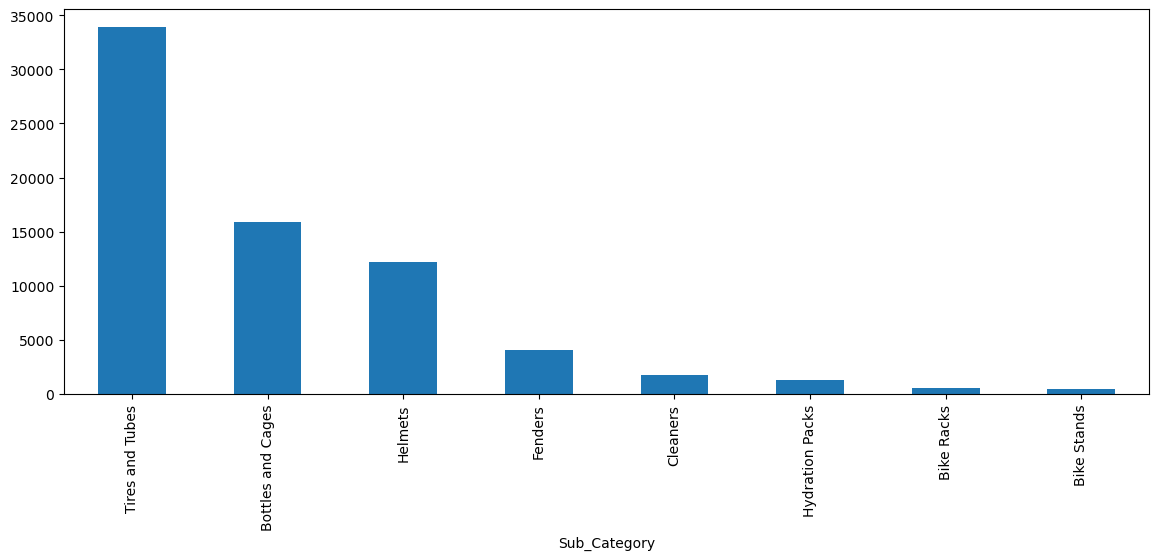

In [169]:
df[df['Product_Category'] == 'Accessories'].groupby(['Sub_Category']).size().sort_values(ascending=False).plot(kind='bar', figsize=(14,5))
# df.loc[sales['Product_Category'] == 'Accessories', 'Sub_Category'].value_counts().plot(kind='bar', figsize=(14,6))

### How many orders were made per bike sub-categories?

In [170]:
df[df['Product_Category'] == 'Bikes'].groupby(['Sub_Category']).size().sort_values(ascending=False)
# df.loc[df['Product_Category'] == 'Bikes', 'Sub_Category'].value_counts()

Sub_Category
Road Bikes        13430
Mountain Bikes     8854
Touring Bikes      3698
dtype: int64

Showing a <b>pie plot</b> with the results:

<Axes: >

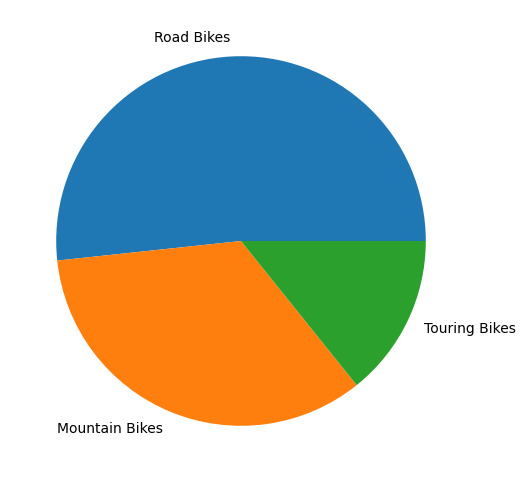

In [171]:
df[df['Product_Category'] == 'Bikes'].groupby(['Sub_Category']).size().sort_values(ascending=False).plot(kind='pie', figsize=(6,6))


### Which gender has the most amount of sales?

In [172]:
df.groupby(['Customer_Gender']).size().sort_values(ascending=False)


Customer_Gender
M    58312
F    54724
dtype: int64

<Axes: xlabel='Customer_Gender'>

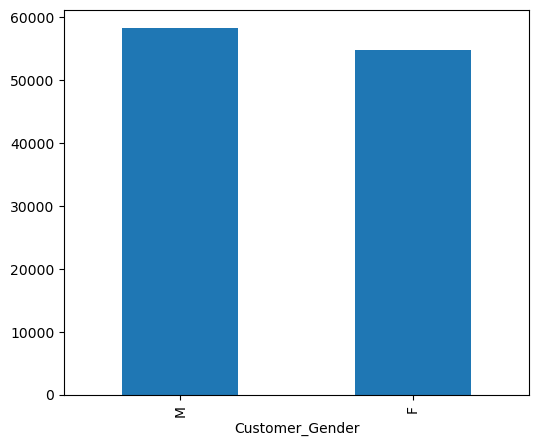

In [173]:
df.groupby(['Customer_Gender']).size().sort_values(ascending=False).plot(kind='bar', figsize=(6,5))

### How many sales with more than 500 in `Revenue` were made by men?

In [174]:
len(df[(df['Revenue'] > 500) & (df['Customer_Gender'] == 'M')])
# df.loc[(sales['Customer_Gender'] == 'M') & (df['Revenue'] >= 500)].shape[0]

23480

### Getting the top-5 sales with the highest revenue

In [175]:
df.sort_values(['Revenue'], ascending=False).head(5)

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,...,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Revenue_per_Age,Calculated_Cost,Calculated_Revenue,Calculated_Date
112073,2015-07-24,24,July,2015,52,Adults (35-64),M,Australia,Queensland,Clothing,...,29,1482,2455.52,15096,42978,58124.0,1116.807692,42978,58074,2015-07-24
112072,2013-07-24,24,July,2013,52,Adults (35-64),M,Australia,Queensland,Clothing,...,27,1482,2455.52,14055,40014,54119.0,1039.788462,40014,54069,2013-07-24
58741,2011-02-14,14,February,2011,41,Adults (35-64),M,France,Essonne,Bikes,...,4,2171,3685.34,5056,8684,15164.0,335.121951,8684,13740,2011-02-14
71129,2011-07-08,8,July,2011,22,Youth (<25),M,Canada,Alberta,Bikes,...,4,2171,3685.34,5628,8684,14362.0,650.545455,8684,14312,2011-07-08
59919,2011-03-20,20,March,2011,29,Young Adults (25-34),F,Germany,Bayern,Bikes,...,4,2171,3685.34,5485,8684,14219.0,488.586207,8684,14169,2011-03-20


### Getting the sale with the highest revenue

In [176]:
df.sort_values(['Revenue'], ascending=False).head(1)
# cond = df['Revenue'] == df['Revenue'].max()
# df.loc[cond]

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,...,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Revenue_per_Age,Calculated_Cost,Calculated_Revenue,Calculated_Date
112073,2015-07-24,24,July,2015,52,Adults (35-64),M,Australia,Queensland,Clothing,...,29,1482,2455.52,15096,42978,58124.0,1116.807692,42978,58074,2015-07-24


### What is the mean of the orders with more than 10K in revenue?

In [177]:
df[df['Revenue'] > 10000]['Order_Quantity'].mean()
# cond = df['Revenue'] > 10_000
# df.loc[cond, 'Order_Quantity'].mean()

3.6526315789473682

### What is the mean of the orders with less than 10K in revenue?

In [178]:
df[df['Revenue'] < 10000]['Order_Quantity'].mean()
#cond = df['Revenue'] < 10_000
#df.loc[cond, 'Order_Quantity'].mean()


11.91554862378817

### How many orders were made in May of 2016?

In [179]:
len(df[(df['Year'] == 2016) & (df['Month'] == 'May')])
# cond = (df['Year'] == 2016) & (df['Month'] == 'May')
# df.loc[cond].shape[0]

5015

### How many orders were made between May and July of 2016?

In [181]:
# len(df[(df['Year'] == 2016) & ((df['Month'] == 'May') | (df['Month'] == 'June') | (df['Month'] == 'July'))])
cond = (df['Year'] == 2016) & (df['Month'].isin(['May', 'June', 'July']))
df.loc[cond].shape[0]

12164

Showing a grouped <b>box plot</b> per month with the profit values.

In [ ]:
df.groupby(['Month'])['Profit'].sum()


Month
April        2864719
August       2214204
December     3409712
February     2562322
January      2618521
July         2139750
June         3383583
March        2761866
May          3326937
November     2388513
October      2301312
September    2249661
Name: Profit, dtype: int64

<Axes: title={'center': 'Profit'}, xlabel='[Month]'>

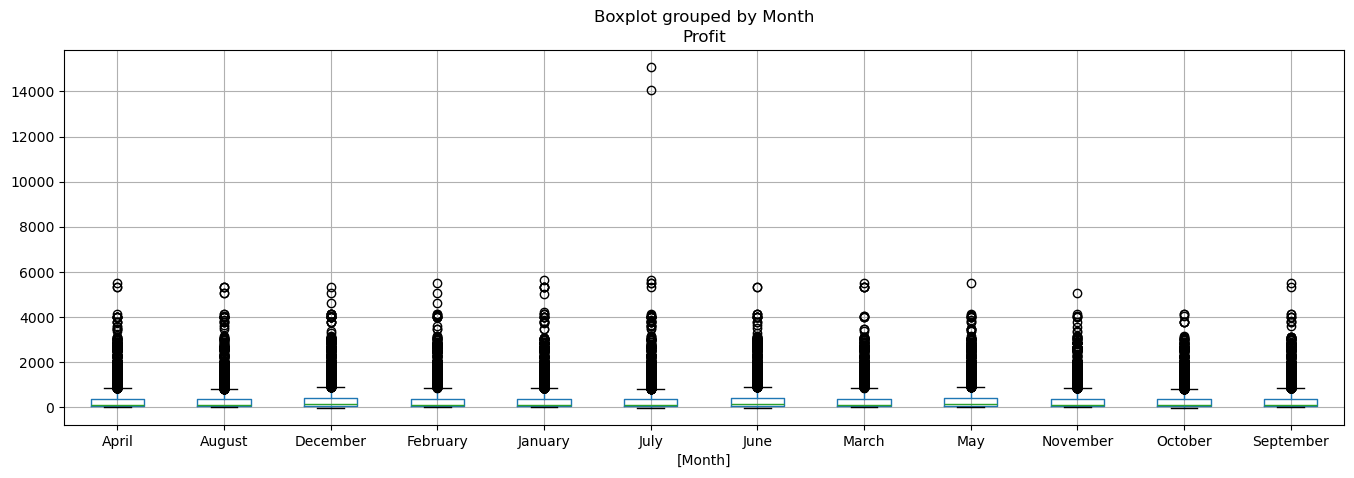

In [ ]:
df[['Month', 'Profit']].boxplot(by='Month', figsize=(16,5))

### Adding 7.2% TAX on every sale `Unit_Price` within United States

In [ ]:
# df['Country']['Unit_Price'] = df['Unit_Price'] + (df['Unit_Price'] * 0.072)
df.loc[df['Country'] == 'United States', 'Unit_Price'] *= 1.072

In [94]:
df[df['Country'] == 'United States']['Unit_Price']
# df.loc[df['Country'] == 'United States', 'Unit_Price']

22        132.49920
23        132.49920
34        132.49920
35        132.49920
38        132.49920
            ...    
113021     70.66624
113022     70.66624
113023     70.66624
113024     70.66624
113025     70.66624
Name: Unit_Price, Length: 39206, dtype: float64